<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/selecting-the-best-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [2]:
# Generate Simulated Data for Polynomial Regression
# Load necessary library
#library(ggplot2)
#library(dplyr)

# Set seed for reproducibility
set.seed(15)
n <- 100
X <- rnorm(n)
epsilon <- rnorm(n)

# Setting beta coefficients
beta0 <- 2
beta1 <- 3
beta2 <- -1.5
beta3 <- 0.5

# Generate response variable Y
Y <- beta0 + beta1*X + beta2*X^2 + beta3*X^3 + epsilon

# Create a data frame with X and powers of X up to X^10
data <- data.frame(y = Y, x1 = X)
for (i in 2:10) {
  data[paste0("x", i)] <- X^i
}


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [4]:
install.packages("leaps")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
library(leaps)

# Run best subset selection
best_subset <- regsubsets(y ~ ., data = data, nvmax = 10)
best_subset_summary <- summary(best_subset)
print(best_subset_summary)


Subset selection object
Call: regsubsets.formula(y ~ ., data = data, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
x1      FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          x1  x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 )  "*" " " " " " " " " " " " " " " " " " "
2  ( 1 )  "*" "*" " " " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" " " " " "*" " " " " " " " "
5  ( 1 )  "*" "*" "*" " " "*" "*" " " " " " " " "
6  ( 1 )  "*" "*" "*" " " " " "*" " " "*" " " "*"
7  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " "*"
8  ( 1 )  "*" "*" "*" "*" "*" "*" " " "*" " " "*"
9  ( 1 )  "*" "*" " " "*" "*" "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"


In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

Best model according to Cp has 4 variables
Best model according to BIC has 4 variables
Best model according to adjusted R^2 has 7 variables
(Intercept)          x1          x2          x3          x6 
 1.56961161  3.03196689 -0.99913369  0.49080549 -0.01730072 


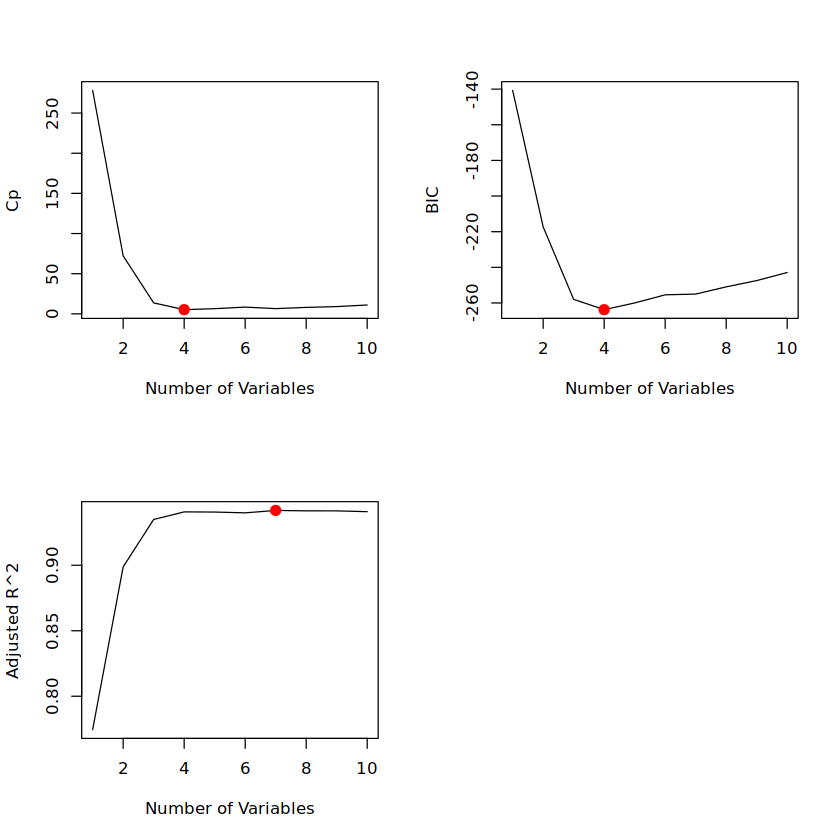

In [6]:
# Mallow's Cp, BIC, and Adjusted R^2 plots
par(mfrow = c(2, 2))

# Plot Cp
plot(best_subset_summary$cp, xlab = "Number of Variables", ylab = "Cp", type = "l")
points(which.min(best_subset_summary$cp), best_subset_summary$cp[which.min(best_subset_summary$cp)], col = "red", cex = 2, pch = 20)

# Plot BIC
plot(best_subset_summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
points(which.min(best_subset_summary$bic), best_subset_summary$bic[which.min(best_subset_summary$bic)], col = "red", cex = 2, pch = 20)

# Plot Adjusted R^2
plot(best_subset_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R^2", type = "l")
points(which.max(best_subset_summary$adjr2), best_subset_summary$adjr2[which.max(best_subset_summary$adjr2)], col = "red", cex = 2, pch = 20)

# Find best model according to each criterion
cp_best <- which.min(best_subset_summary$cp)
bic_best <- which.min(best_subset_summary$bic)
adjr2_best <- which.max(best_subset_summary$adjr2)

# Print the best model according to each criterion
cat("Best model according to Cp has", cp_best, "variables\n")
cat("Best model according to BIC has", bic_best, "variables\n")
cat("Best model according to adjusted R^2 has", adjr2_best, "variables\n")

# Get coefficients of the best model (using BIC as criterion)
best_model_coef <- coef(best_subset, id = bic_best)
print(best_model_coef)


> *Write your response here* 
> 

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

Forward selection best model according to BIC has 4 variables
(Intercept)          x1          x2          x3          x6 
 1.56961161  3.03196689 -0.99913369  0.49080549 -0.01730072 


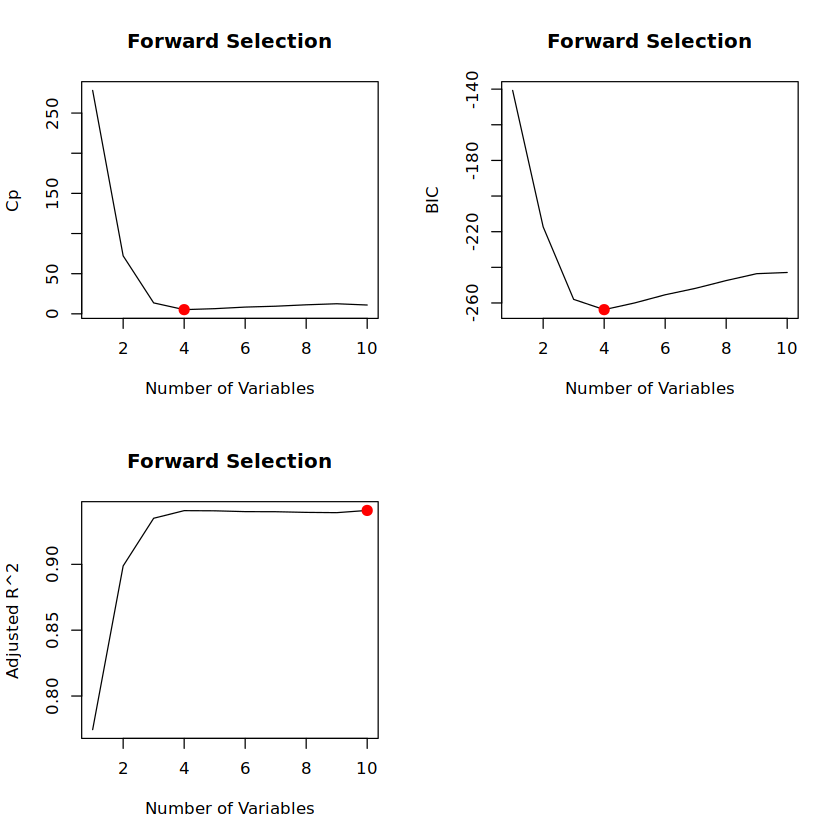

In [ ]:
# Forward stepwise selection
forward_subset <- regsubsets(y ~ ., data = data, nvmax = 10, method = "forward")
forward_summary <- summary(forward_subset)

par(mfrow = c(2, 2))

# Plot selection criteria
plot(forward_summary$cp, xlab = "Number of Variables", ylab = "Cp", type = "l", main = "Forward Selection")
points(which.min(forward_summary$cp), forward_summary$cp[which.min(forward_summary$cp)], col = "red", cex = 2, pch = 20)

plot(forward_summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l", main = "Forward Selection")
points(which.min(forward_summary$bic), forward_summary$bic[which.min(forward_summary$bic)], col = "red", cex = 2, pch = 20)

plot(forward_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R^2", type = "l", main = "Forward Selection")
points(which.max(forward_summary$adjr2), forward_summary$adjr2[which.max(forward_summary$adjr2)], col = "red", cex = 2, pch = 20)

# Find best model according to BIC
forward_best <- which.min(forward_summary$bic)
cat("Forward selection best model according to BIC has", forward_best, "variables\n")

# Get coefficients of the best forward model
forward_best_coef <- coef(forward_subset, id = forward_best)
print(forward_best_coef)

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

b) Backwards stepwise selection:

Backward selection best model according to BIC has 5 variables
(Intercept)          x1          x2          x5          x6          x7 
 1.59814290  3.28224283 -1.04726429  0.22256438 -0.01604063 -0.02528877 


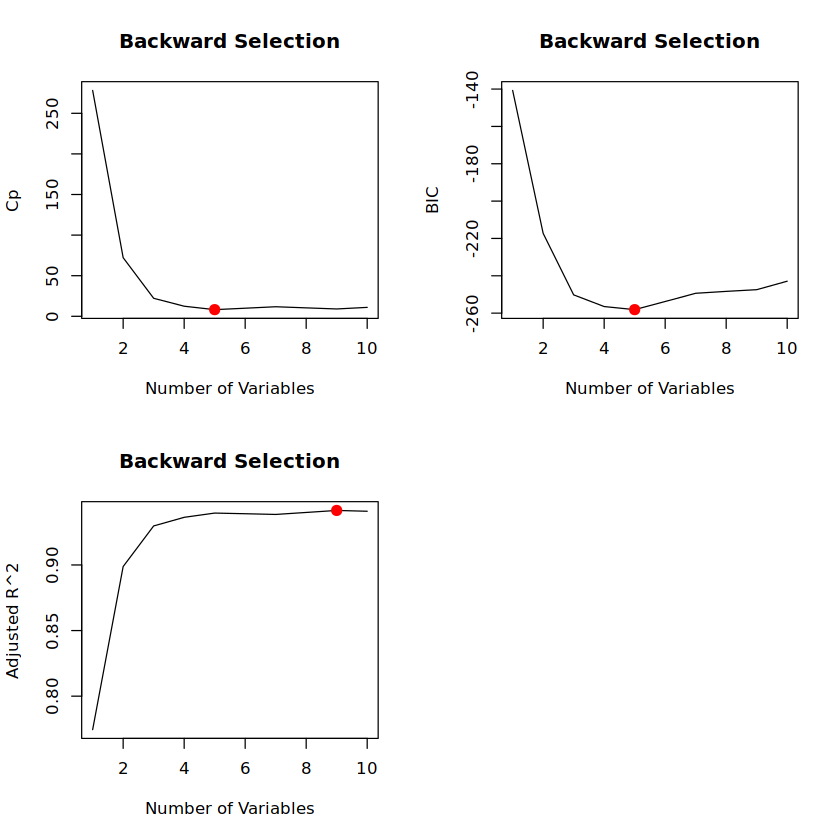

In [8]:
# Backward stepwise selection
backward_subset <- regsubsets(y ~ ., data = data, nvmax = 10, method = "backward")
backward_summary <- summary(backward_subset)

par(mfrow = c(2, 2))

# Plot selection criteria
plot(backward_summary$cp, xlab = "Number of Variables", ylab = "Cp", type = "l", main = "Backward Selection")
points(which.min(backward_summary$cp), backward_summary$cp[which.min(backward_summary$cp)], col = "red", cex = 2, pch = 20)

plot(backward_summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l", main = "Backward Selection")
points(which.min(backward_summary$bic), backward_summary$bic[which.min(backward_summary$bic)], col = "red", cex = 2, pch = 20)

plot(backward_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R^2", type = "l", main = "Backward Selection")
points(which.max(backward_summary$adjr2), backward_summary$adjr2[which.max(backward_summary$adjr2)], col = "red", cex = 2, pch = 20)

# Find best model according to BIC
backward_best <- which.min(backward_summary$bic)
cat("Backward selection best model according to BIC has", backward_best, "variables\n")

# Get coefficients of the best backward model
backward_best_coef <- coef(backward_subset, id = backward_best)
print(backward_best_coef)

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.

> *Write your response here* 
> 

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [12]:
# Simulate dataset with p=20 and n=1,000
set.seed(123)
n <- 1000
p <- 20

# Generate predictors
X <- matrix(rnorm(n * p), n, p)
colnames(X) <- paste0("X", 1:p)

# Generate random beta with some coefficients exactly zero
beta <- rnorm(p)
# Set some coefficients to zero (e.g., 60% of them)
zero_indices <- sample(1:p, p * 0.6)
beta[zero_indices] <- 0

# Generate response variable with error term
epsilon <- rnorm(n)
Y <- X %*% beta + epsilon

# Create a data frame with proper column names
data_full <- data.frame(Y = Y, X)

# Split into training and test sets
train_indices <- sample(1:n, 100)
train_data <- data_full[train_indices, ]
test_data <- data_full[-train_indices, ]



b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

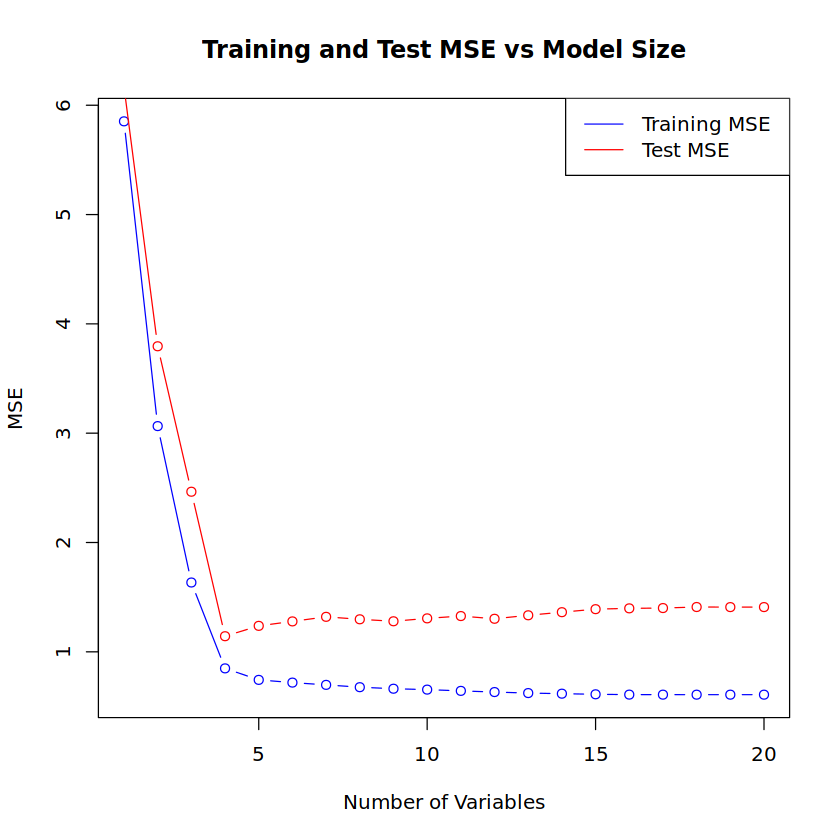

In [13]:
# Run best subset selection on training set
regfit_train <- regsubsets(Y ~ ., data = train_data, nvmax = p)
regfit_summary <- summary(regfit_train)

# Calculate training MSE for each model size
train_mse <- rep(NA, p)
for (i in 1:p) {
  # Get model matrix for training data
  train_mat <- model.matrix(Y ~ ., data = train_data)
  # Get coefficients for model of size i
  coefi <- coef(regfit_train, id = i)
  # Get predictions (need to match coefficient names with columns in model matrix)
  pred <- train_mat[, names(coefi)] %*% coefi
  # Calculate MSE
  train_mse[i] <- mean((train_data$Y - pred)^2)
}

# Calculate test MSE for each model size
test_mse <- rep(NA, p)
for (i in 1:p) {
  # Get model matrix for test data
  test_mat <- model.matrix(Y ~ ., data = test_data)
  # Get coefficients for model of size i
  coefi <- coef(regfit_train, id = i)
  # Get predictions (need to match coefficient names with columns in model matrix)
  pred <- test_mat[, names(coefi)] %*% coefi
  # Calculate MSE
  test_mse[i] <- mean((test_data$Y - pred)^2)
}

# Plot training and test MSE
par(mfrow = c(1, 1))
plot(1:p, train_mse, type = "b", col = "blue", xlab = "Number of Variables", 
     ylab = "MSE", main = "Training and Test MSE vs Model Size")
lines(1:p, test_mse, type = "b", col = "red")
legend("topright", c("Training MSE", "Test MSE"), col = c("blue", "red"), lty = 1)

c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [14]:
#  Identify best model according to test MSE
best_size <- which.min(test_mse)
cat("The best model according to test MSE has", best_size, "variables\n")

# Get coefficients of the best model
best_test_coef <- coef(regfit_train, id = best_size)
print(best_test_coef)

# Compare with true non-zero coefficients
cat("Number of true non-zero coefficients:", sum(beta != 0), "\n")
cat("Indices of true non-zero coefficients:", which(beta != 0), "\n")

# Compare with variables selected in best model (excluding intercept)
selected_vars <- names(best_test_coef)[-1]  # Remove intercept
cat("Variables selected in best model:", selected_vars, "\n")

# Check overlap between true non-zero coefficients and selected variables
selected_indices <- as.numeric(gsub("X", "", selected_vars))
true_indices <- which(beta != 0)
overlap <- sum(selected_indices %in% true_indices)

cat("Number of correctly identified variables:", overlap, "\n")
cat("Number of falsely included variables:", length(selected_indices) - overlap, "\n")

The best model according to test MSE has 4 variables
(Intercept)          X4          X5         X12         X15 
 -0.0963277  -1.7492671  -0.9650761   1.2047791   1.7302002 


Number of true non-zero coefficients: 8 
Indices of true non-zero coefficients: 2 4 5 7 12 15 17 18 
Variables selected in best model: X4 X5 X12 X15 
Number of correctly identified variables: 4 
Number of falsely included variables: 0 


> *Write your response here* 
> 

**DUE:** 5pm EST, April 7, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*